In [1]:
import pandas as pd # to read CSV files (Comma Separated Values)

train_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.x.csv')
train_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att18,att19,att20,att21,att22,att23,att24,att25,att26,msd_track_id
0,1,41.08,6.579,4.307,3.421,3.192,2.076,2.179,2.052,1.794,...,1.3470,-0.2463,-1.5470,0.17920,-1.1530,-0.7370,0.40750,-0.67190,-0.05147,TRPLTEM128F92E1389
1,2,60.80,5.973,4.344,3.261,2.835,2.725,2.446,1.884,1.962,...,-0.3316,0.3519,-1.4760,0.52700,-2.1960,1.5990,-1.39000,0.22560,-0.72080,TRJWMBQ128F424155E
2,3,51.47,4.971,4.316,2.916,3.112,2.290,2.053,1.934,1.878,...,-0.2803,-0.1603,-0.1355,1.03500,0.2370,1.4890,0.02959,-0.13670,0.10820,TRRZWMO12903CCFCC2
3,4,41.28,6.610,4.411,2.602,2.822,2.126,1.984,1.973,1.945,...,-1.6930,1.0040,-0.3953,0.26710,-1.0450,0.4974,0.03724,1.04500,-0.20000,TRBZRUT12903CE6C04
4,5,54.17,8.945,4.685,4.208,3.154,3.527,2.733,2.202,2.686,...,2.4690,-0.5449,-0.5622,-0.08968,-0.9823,-0.2445,-1.65800,-0.04825,-0.70950,TRLUJQF128F42AF5BF


In [2]:
train_y = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.y.csv')
train_y.head()

,Id,class_label
0,1,International
1,2,Vocal
2,3,Latin
3,4,Blues
4,5,Vocal


In [3]:
test_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/test.x.csv')
test_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26
0,1,38.22,8.076,6.935,4.696,3.856,3.465,2.922,2.568,2.070,...,3.988,0.4957,0.1836,-2.2210,0.6453,-0.2923,1.2000,-0.09179,0.4674,0.2158
1,2,36.42,6.131,5.364,4.292,3.968,2.937,2.872,2.142,2.050,...,7.098,1.2290,0.5971,-1.0670,0.9569,-1.8240,2.3130,-0.80890,0.5612,-0.6225
2,3,70.01,5.496,4.698,3.699,3.258,2.293,2.680,2.226,2.034,...,4.449,0.4773,1.6370,-1.0690,2.4160,-0.6299,1.4190,-0.81960,0.9151,-0.5948
3,4,40.64,7.281,6.702,4.043,3.729,3.043,2.644,2.366,1.940,...,2.785,1.9000,-1.1370,1.2750,1.7920,-2.1250,1.6090,-0.83230,-0.1998,-0.1218
4,5,38.85,7.118,5.703,4.825,4.088,3.823,3.254,2.551,2.193,...,4.536,2.1470,1.0200,-0.2656,2.8050,0.2762,0.2504,1.04900,0.3447,-0.7689


In [4]:
test_y_sample = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/submission-random.csv')
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991


In [5]:
test_y_sample[:0]

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal


In [6]:
import numpy as np

train_X = np.array(train_x)
train_Y = np.array(train_y[:]['class_label'])
test_X = np.array(test_x)

# Getting rid of the first and the last column: Id and msd_track_id
X_train_val = np.array(train_X[:, 1:-1], dtype=float)
X_test = np.array(test_X[:, 1:], dtype=float)

train_Y.shape

(13000,)

In [7]:
from collections import Counter

# Count the freq of the keys in the training labels
counted_labels = Counter(train_Y)
labels_keys = counted_labels.keys()
labels_keys

dict_keys(['International', 'Vocal', 'Latin', 'Blues', 'Jazz', 'Folk', 'RnB', 'Pop_Rock', 'New_Age', 'Rap', 'Reggae', 'Electronic', 'Country'])

In [8]:
labels_keys_sorted = sorted(labels_keys)
labels_keys_sorted

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [9]:
# This for loop for creating a dictionary/ vocab
key_to_val = {key: val for val, key in enumerate(labels_keys_sorted)}
key_to_val['Country']
key_to_val

{'Blues': 0,
 'Country': 1,
 'Electronic': 2,
 'Folk': 3,
 'International': 4,
 'Jazz': 5,
 'Latin': 6,
 'New_Age': 7,
 'Pop_Rock': 8,
 'Rap': 9,
 'Reggae': 10,
 'RnB': 11,
 'Vocal': 12}

In [10]:
val_to_key = {val: key for val, key in enumerate(labels_keys_sorted)}
val_to_key[1]
val_to_key

{0: 'Blues',
 1: 'Country',
 2: 'Electronic',
 3: 'Folk',
 4: 'International',
 5: 'Jazz',
 6: 'Latin',
 7: 'New_Age',
 8: 'Pop_Rock',
 9: 'Rap',
 10: 'Reggae',
 11: 'RnB',
 12: 'Vocal'}

In [11]:
Y_train_vec = []
for each in train_y[:]['class_label']:
#     print(each, key_to_val[each])
    Y_train_vec.append(key_to_val[each])

Y_train_val = np.array(Y_train_vec)
Y_train_val.shape

(13000,)

In [12]:
# # Pre-processing: normalizing
# def normalize(X):
#     # max scale for images 255= 2**8= 8 bit grayscale for each channel
#     return (X - X.mean(axis=0)) #/ X.std(axis=0)
# X_train, X_val, X_test = normalize(X=X_train), normalize(X=X_val), normalize(X=X_test)

# Preprocessing: normalizing the data based on the training set
mean = X_train_val.mean(axis=0)
std = X_train_val.std(axis=0)

X_train_val, X_test = (X_train_val - mean)/ std, (X_test - mean)/ std
X_train_val.shape, X_test.shape, X_train_val.dtype, X_test.dtype

((13000, 26), (10400, 26), dtype('float64'), dtype('float64'))

In [13]:
# Creating validation set: 10% or 1/10 of the training set or whatever dataset with labels/ annotation
valid_size = X_train_val.shape[0]//10
valid_size
X_val = X_train_val[-valid_size:]
Y_val = Y_train_val[-valid_size:]
X_train = X_train_val[: -valid_size]
Y_train = Y_train_val[: -valid_size]
X_train_val.shape, 
X_train.shape, X_val.shape, X_test.shape, Y_val.shape, Y_train.shape 
# X_train.dtype, X_val.dtype
# Y_train.dtype, Y_val

((11700, 26), (1300, 26), (10400, 26), (1300,), (11700,))

In [17]:
# Model
import impl.layer as l # or from impl.layer import *
from impl.loss import * # import all functions from impl.loss file # import impl.loss as loss_func
from sklearn.utils import shuffle as skshuffle

class FFNN:

    def __init__(self, D, C, H, L):
        self.L = L # number of layers or depth
        self.losses = {'train':[], 'train_acc':[], 'valid':[], 'valid_acc':[]}
        
        # The adaptive/learnable/updatable random feedforward
        self.model = []
        self.grads = []
        low, high = -1, 1
        
        # Input layer: weights/ biases
        m = dict(W=np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.), 
                 b=np.zeros((1, H)))
        self.model.append(m)
        # Input layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[0].items()})

        # Hidden layers: weights/ biases
        m_L = []
        for _ in range(L):
            m = dict(W=np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.), 
                     b=np.zeros((1, H)))
            m_L.append(m)
        self.model.append(m_L)
        # Hidden layer: gradients
        grad_L = []
        for _ in range(L):
            grad_L.append({key: np.zeros_like(val) for key, val in self.model[1][0].items()})
        self.grads.append(grad_L)
        
        # Output layer: weights/ biases
        m = dict(W=np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.), 
                 b=np.zeros((1, C)))
        self.model.append(m)
        # Outout layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[2].items()})
        
    def fc_forward(self, X, W, b):
        out = (X @ W) + b
        cache = (W, X)
        return out, cache

    def fc_backward(self, dout, cache):
        W, X = cache

        dW = X.T @ dout
        db = np.sum(dout, axis=0).reshape(1, -1) # db_1xn
        dX = dout @ W.T # Backprop

        return dX, dW, db

    def train_forward(self, X, train):
        caches, ys = [], []
        
        # Input layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[0]['W'], b=self.model[0]['b']) # X_1xD, y_1xc
        y, nl_cache = l.tanh_forward(X=y)
        X = y.copy() # pass to the next layer
        if train:
            caches.append((fc_cache, nl_cache))
        
        # Hidden layers
        fc_caches, nl_caches = [], []
        for layer in range(self.L):
            y, fc_cache = self.fc_forward(X=X, W=self.model[1][layer]['W'], b=self.model[1][layer]['b'])
            y, nl_cache = l.tanh_forward(X=y)
            X = y.copy() # pass to next layer
            if train:
                fc_caches.append(fc_cache)
                nl_caches.append(nl_cache)
        if train:
            caches.append((fc_caches, nl_caches)) # caches[1]            
        
        # Output layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[2]['W'], b=self.model[2]['b'])
        # Softmax is included in loss function
        if train:
            caches.append(fc_cache)

        return y, caches # for backpropating the error

    def loss_function(self, y, y_train):
        
        loss = cross_entropy(y, y_train) # softmax is included
        dy = dcross_entropy(y, y_train) # dsoftmax is included
        
        return loss, dy
        
    def train_backward(self, dy, caches):
        grads = self.grads # initialized by Zero in every iteration/epoch
        
        # Output layer
        fc_cache = caches[2]
        # dSoftmax is included in loss function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache)
        dy = dX.copy()
        grads[2]['W'] = dW
        grads[2]['b'] = db

        # Hidden layer
        fc_caches, nl_caches = caches[1]
        for layer in reversed(range(self.L)):
            dy = l.tanh_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dX, dW, db = self.fc_backward(dout=dy, cache=fc_caches[layer])
            dy = dX.copy()
            grads[1][layer]['W'] = dW
            grads[1][layer]['b'] = db
        
        # Input layer
        fc_cache, nl_cache = caches[0]
        dy = l.tanh_backward(cache=nl_cache, dout=dy) # diffable function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache)
        grads[0]['W'] = dW
        grads[0]['b'] = db

        return dX, grads
    
    def test(self, X):
        y_logit, _ = self.train_forward(X, train=False)
        
        # if self.mode == 'classification':
        y_prob = l.softmax(y_logit) # for accuracy == acc
        y_pred = np.argmax(y_prob, axis=1) # for loss ==err
        
        return y_pred, y_logit
        
    def get_minibatch(self, X, y, minibatch_size, shuffle):
        minibatches = []

        if shuffle:
            X, y = skshuffle(X, y)

        for i in range(0, X.shape[0], minibatch_size):
            X_mini = X[i:i + minibatch_size]
            y_mini = y[i:i + minibatch_size]
            minibatches.append((X_mini, y_mini))

        return minibatches

    def sgd(self, train_set, val_set, alpha, mb_size, n_iter, print_after):
        X_train, y_train = train_set
        X_val, y_val = val_set

        # Epochs
        for iter in range(1, n_iter + 1):

            # Minibatches
            minibatches = self.get_minibatch(X_train, y_train, mb_size, shuffle=True)
            idx = np.random.randint(0, len(minibatches))
            X_mini, y_mini = minibatches[idx]
            
            # Train the model
            y, caches = self.train_forward(X_mini, train=True)
            _, dy = self.loss_function(y, y_mini)
            _, grads = self.train_backward(dy, caches) 
            
            # Update the model for input layer
            for key in grads[0].keys():
                self.model[0][key] -= alpha * grads[0][key]

            # Update the model for the hidden layers
            for layer in range(self.L):
                for key in grads[1][layer].keys():
                    self.model[1][layer][key] -= alpha * grads[1][layer][key]

            # Update the model for output layer
            for key in grads[2].keys():
                self.model[2][key] -= alpha * grads[2][key]
                
            # Trained model info
            y_pred, y_logit = self.test(X_mini)
            loss, _ = self.loss_function(y_logit, y_mini) # softmax is included in entropy loss function
            self.losses['train'].append(loss)
            acc = np.mean(y_pred == y_mini) # confusion matrix
            self.losses['train_acc'].append(acc)

            # Validated model info
            y_pred, y_logit = self.test(X_val)
            valid_loss, _ = self.loss_function(y_logit, y_val) # softmax is included in entropy loss function
            self.losses['valid'].append(valid_loss)
            valid_acc = np.mean(y_pred == y_val) # confusion matrix
            self.losses['valid_acc'].append(valid_acc)
            
            # Print the model info: loss & accuracy or err & acc
            if iter % print_after == 0:
                print('Iter: {}, train loss: {:.4f}, train acc: {:.4f}, valid loss: {:.4f}, valid acc: {:.4f}'.format(
                    iter, loss, acc, valid_loss, valid_acc))

#         # Test the final model
#         y_pred, y_logit = nn.test(X_test)
#         loss, _ = self.loss_function(y_logit, y_test) # softmax is included in entropy loss function
#         acc = np.mean(y_pred == y_test)
#         print('Last iteration - Test accuracy mean: {:.4f}, std: {:.4f}, loss: {:.4f}'.format(
#             acc.mean(), acc.std(), loss))

In [18]:
Y_train.shape, X_train.shape, X_val.shape, Y_val.shape

((11700,), (11700, 26), (1300, 26), (1300,))

In [19]:
# Hyper-parameters
n_iter = 20000 # number of epochs
alpha = 1e-2 # learning_rate
mb_size = 50 # 2**10==1024 # width, timestep for sequential data or minibatch size
print_after = 10 # n_iter//10 # print loss for train, valid, and test
num_hidden_units = 32 # number of kernels/ filters in each layer
num_input_units = X_train.shape[1] # noise added at the input lavel as input noise we can use dX or for more improvement
num_output_units = Y_train.max() + 1 # number of classes in this classification problem
# num_output_units = Y_train.shape[1] # number of classes in this classification problem
num_layers = 2 # depth 

# Build the model/NN and learn it: running session.
nn = FFNN(C=num_output_units, D=num_input_units, H=num_hidden_units, L=num_layers)

nn.sgd(train_set=(X_train, Y_train), val_set=(X_val, Y_val), mb_size=mb_size, alpha=alpha, 
           n_iter=n_iter, print_after=print_after)

Iter: 10, train loss: 2.5810, train acc: 0.0400, valid loss: 2.5948, valid acc: 0.0854
Iter: 20, train loss: 2.6000, train acc: 0.1000, valid loss: 2.5866, valid acc: 0.0854
Iter: 30, train loss: 2.5865, train acc: 0.1200, valid loss: 2.5794, valid acc: 0.0877
Iter: 40, train loss: 2.5920, train acc: 0.0400, valid loss: 2.5726, valid acc: 0.0885
Iter: 50, train loss: 2.5621, train acc: 0.0800, valid loss: 2.5659, valid acc: 0.0923
Iter: 60, train loss: 2.5640, train acc: 0.1200, valid loss: 2.5604, valid acc: 0.0946
Iter: 70, train loss: 2.5251, train acc: 0.1400, valid loss: 2.5543, valid acc: 0.0992
Iter: 80, train loss: 2.5089, train acc: 0.0800, valid loss: 2.5486, valid acc: 0.1085
Iter: 90, train loss: 2.5355, train acc: 0.1200, valid loss: 2.5424, valid acc: 0.1131
Iter: 100, train loss: 2.5850, train acc: 0.0600, valid loss: 2.5376, valid acc: 0.1192
Iter: 110, train loss: 2.5427, train acc: 0.0400, valid loss: 2.5323, valid acc: 0.1277
Iter: 120, train loss: 2.5127, train acc:

Iter: 970, train loss: 2.1936, train acc: 0.3000, valid loss: 2.2422, valid acc: 0.2238
Iter: 980, train loss: 2.2004, train acc: 0.1800, valid loss: 2.2406, valid acc: 0.2254
Iter: 990, train loss: 2.2432, train acc: 0.2400, valid loss: 2.2396, valid acc: 0.2277
Iter: 1000, train loss: 2.1650, train acc: 0.1800, valid loss: 2.2380, valid acc: 0.2269
Iter: 1010, train loss: 2.1042, train acc: 0.2800, valid loss: 2.2365, valid acc: 0.2208
Iter: 1020, train loss: 2.3046, train acc: 0.2200, valid loss: 2.2351, valid acc: 0.2215
Iter: 1030, train loss: 2.2480, train acc: 0.1400, valid loss: 2.2336, valid acc: 0.2300
Iter: 1040, train loss: 2.2380, train acc: 0.2000, valid loss: 2.2325, valid acc: 0.2300
Iter: 1050, train loss: 2.2240, train acc: 0.2400, valid loss: 2.2313, valid acc: 0.2308
Iter: 1060, train loss: 2.1311, train acc: 0.3000, valid loss: 2.2293, valid acc: 0.2292
Iter: 1070, train loss: 2.1785, train acc: 0.2800, valid loss: 2.2279, valid acc: 0.2308
Iter: 1080, train loss: 

Iter: 1920, train loss: 2.0456, train acc: 0.3400, valid loss: 2.1467, valid acc: 0.2669
Iter: 1930, train loss: 1.9446, train acc: 0.3400, valid loss: 2.1458, valid acc: 0.2685
Iter: 1940, train loss: 2.2105, train acc: 0.3200, valid loss: 2.1450, valid acc: 0.2715
Iter: 1950, train loss: 2.1003, train acc: 0.2400, valid loss: 2.1438, valid acc: 0.2746
Iter: 1960, train loss: 2.0831, train acc: 0.3200, valid loss: 2.1432, valid acc: 0.2708
Iter: 1970, train loss: 2.1811, train acc: 0.3000, valid loss: 2.1418, valid acc: 0.2746
Iter: 1980, train loss: 2.0031, train acc: 0.2200, valid loss: 2.1415, valid acc: 0.2762
Iter: 1990, train loss: 2.2312, train acc: 0.2800, valid loss: 2.1414, valid acc: 0.2808
Iter: 2000, train loss: 2.0458, train acc: 0.3400, valid loss: 2.1412, valid acc: 0.2846
Iter: 2010, train loss: 2.2174, train acc: 0.2800, valid loss: 2.1402, valid acc: 0.2846
Iter: 2020, train loss: 2.0974, train acc: 0.3400, valid loss: 2.1396, valid acc: 0.2769
Iter: 2030, train los

Iter: 2850, train loss: 2.0619, train acc: 0.3000, valid loss: 2.0953, valid acc: 0.2946
Iter: 2860, train loss: 2.1260, train acc: 0.2800, valid loss: 2.0954, valid acc: 0.2977
Iter: 2870, train loss: 2.1212, train acc: 0.2000, valid loss: 2.0948, valid acc: 0.2938
Iter: 2880, train loss: 1.9858, train acc: 0.1800, valid loss: 2.0949, valid acc: 0.2946
Iter: 2890, train loss: 1.8919, train acc: 0.4400, valid loss: 2.0937, valid acc: 0.2908
Iter: 2900, train loss: 1.9683, train acc: 0.3200, valid loss: 2.0934, valid acc: 0.2923
Iter: 2910, train loss: 2.0800, train acc: 0.2800, valid loss: 2.0935, valid acc: 0.2908
Iter: 2920, train loss: 1.9874, train acc: 0.2600, valid loss: 2.0929, valid acc: 0.2931
Iter: 2930, train loss: 2.0978, train acc: 0.2600, valid loss: 2.0928, valid acc: 0.2923
Iter: 2940, train loss: 1.8841, train acc: 0.3800, valid loss: 2.0927, valid acc: 0.2962
Iter: 2950, train loss: 1.9447, train acc: 0.2800, valid loss: 2.0918, valid acc: 0.2969
Iter: 2960, train los

Iter: 3780, train loss: 2.0112, train acc: 0.3600, valid loss: 2.0682, valid acc: 0.3162
Iter: 3790, train loss: 2.1503, train acc: 0.2600, valid loss: 2.0680, valid acc: 0.3162
Iter: 3800, train loss: 1.9924, train acc: 0.4000, valid loss: 2.0679, valid acc: 0.3162
Iter: 3810, train loss: 2.0434, train acc: 0.4600, valid loss: 2.0680, valid acc: 0.3154
Iter: 3820, train loss: 2.0731, train acc: 0.2600, valid loss: 2.0680, valid acc: 0.3169
Iter: 3830, train loss: 2.1271, train acc: 0.3200, valid loss: 2.0678, valid acc: 0.3123
Iter: 3840, train loss: 2.2178, train acc: 0.3400, valid loss: 2.0677, valid acc: 0.3115
Iter: 3850, train loss: 2.1503, train acc: 0.3200, valid loss: 2.0681, valid acc: 0.3162
Iter: 3860, train loss: 1.9721, train acc: 0.3000, valid loss: 2.0676, valid acc: 0.3115
Iter: 3870, train loss: 2.0791, train acc: 0.2800, valid loss: 2.0672, valid acc: 0.3115
Iter: 3880, train loss: 2.0438, train acc: 0.3200, valid loss: 2.0677, valid acc: 0.3123
Iter: 3890, train los

Iter: 4720, train loss: 1.9411, train acc: 0.4400, valid loss: 2.0493, valid acc: 0.3346
Iter: 4730, train loss: 1.8467, train acc: 0.3200, valid loss: 2.0495, valid acc: 0.3331
Iter: 4740, train loss: 2.0662, train acc: 0.3200, valid loss: 2.0489, valid acc: 0.3331
Iter: 4750, train loss: 1.9142, train acc: 0.3400, valid loss: 2.0486, valid acc: 0.3362
Iter: 4760, train loss: 1.8133, train acc: 0.4600, valid loss: 2.0492, valid acc: 0.3362
Iter: 4770, train loss: 2.1307, train acc: 0.2800, valid loss: 2.0496, valid acc: 0.3346
Iter: 4780, train loss: 1.8319, train acc: 0.4600, valid loss: 2.0497, valid acc: 0.3346
Iter: 4790, train loss: 2.2056, train acc: 0.4200, valid loss: 2.0498, valid acc: 0.3338
Iter: 4800, train loss: 1.8074, train acc: 0.4400, valid loss: 2.0498, valid acc: 0.3346
Iter: 4810, train loss: 1.7378, train acc: 0.5200, valid loss: 2.0501, valid acc: 0.3346
Iter: 4820, train loss: 1.8971, train acc: 0.4000, valid loss: 2.0503, valid acc: 0.3308
Iter: 4830, train los

Iter: 5660, train loss: 2.0082, train acc: 0.3400, valid loss: 2.0391, valid acc: 0.3338
Iter: 5670, train loss: 1.9573, train acc: 0.3200, valid loss: 2.0385, valid acc: 0.3285
Iter: 5680, train loss: 1.8339, train acc: 0.4400, valid loss: 2.0380, valid acc: 0.3362
Iter: 5690, train loss: 1.9551, train acc: 0.4000, valid loss: 2.0366, valid acc: 0.3369
Iter: 5700, train loss: 2.0332, train acc: 0.2600, valid loss: 2.0356, valid acc: 0.3354
Iter: 5710, train loss: 1.7461, train acc: 0.4000, valid loss: 2.0351, valid acc: 0.3362
Iter: 5720, train loss: 1.7431, train acc: 0.4000, valid loss: 2.0349, valid acc: 0.3346
Iter: 5730, train loss: 1.8096, train acc: 0.4200, valid loss: 2.0342, valid acc: 0.3354
Iter: 5740, train loss: 2.0022, train acc: 0.3400, valid loss: 2.0350, valid acc: 0.3346
Iter: 5750, train loss: 2.0352, train acc: 0.3200, valid loss: 2.0348, valid acc: 0.3354
Iter: 5760, train loss: 1.9484, train acc: 0.4000, valid loss: 2.0352, valid acc: 0.3377
Iter: 5770, train los

Iter: 6600, train loss: 1.5694, train acc: 0.5200, valid loss: 2.0273, valid acc: 0.3392
Iter: 6610, train loss: 1.8857, train acc: 0.4200, valid loss: 2.0269, valid acc: 0.3400
Iter: 6620, train loss: 1.6758, train acc: 0.5400, valid loss: 2.0279, valid acc: 0.3400
Iter: 6630, train loss: 2.1322, train acc: 0.3800, valid loss: 2.0282, valid acc: 0.3385
Iter: 6640, train loss: 1.9424, train acc: 0.4000, valid loss: 2.0284, valid acc: 0.3362
Iter: 6650, train loss: 2.1540, train acc: 0.2600, valid loss: 2.0283, valid acc: 0.3331
Iter: 6660, train loss: 1.9907, train acc: 0.3200, valid loss: 2.0281, valid acc: 0.3346
Iter: 6670, train loss: 1.8070, train acc: 0.3200, valid loss: 2.0279, valid acc: 0.3369
Iter: 6680, train loss: 1.9870, train acc: 0.3600, valid loss: 2.0272, valid acc: 0.3408
Iter: 6690, train loss: 1.8436, train acc: 0.4400, valid loss: 2.0268, valid acc: 0.3423
Iter: 6700, train loss: 1.9304, train acc: 0.3200, valid loss: 2.0264, valid acc: 0.3385
Iter: 6710, train los

Iter: 7540, train loss: 1.7684, train acc: 0.4400, valid loss: 2.0218, valid acc: 0.3454
Iter: 7550, train loss: 1.8282, train acc: 0.3800, valid loss: 2.0220, valid acc: 0.3485
Iter: 7560, train loss: 2.0848, train acc: 0.3000, valid loss: 2.0229, valid acc: 0.3500
Iter: 7570, train loss: 2.0330, train acc: 0.2600, valid loss: 2.0242, valid acc: 0.3477
Iter: 7580, train loss: 1.6005, train acc: 0.4600, valid loss: 2.0238, valid acc: 0.3462
Iter: 7590, train loss: 1.9288, train acc: 0.2800, valid loss: 2.0233, valid acc: 0.3438
Iter: 7600, train loss: 1.9016, train acc: 0.4000, valid loss: 2.0238, valid acc: 0.3454
Iter: 7610, train loss: 1.8015, train acc: 0.3800, valid loss: 2.0246, valid acc: 0.3469
Iter: 7620, train loss: 1.8527, train acc: 0.3400, valid loss: 2.0248, valid acc: 0.3454
Iter: 7630, train loss: 2.2023, train acc: 0.3400, valid loss: 2.0244, valid acc: 0.3423
Iter: 7640, train loss: 2.0018, train acc: 0.2800, valid loss: 2.0239, valid acc: 0.3469
Iter: 7650, train los

Iter: 8490, train loss: 1.7486, train acc: 0.4400, valid loss: 2.0172, valid acc: 0.3400
Iter: 8500, train loss: 1.7963, train acc: 0.4200, valid loss: 2.0162, valid acc: 0.3454
Iter: 8510, train loss: 2.0079, train acc: 0.3000, valid loss: 2.0157, valid acc: 0.3469
Iter: 8520, train loss: 1.9823, train acc: 0.4400, valid loss: 2.0159, valid acc: 0.3438
Iter: 8530, train loss: 1.8029, train acc: 0.4800, valid loss: 2.0160, valid acc: 0.3392
Iter: 8540, train loss: 1.7896, train acc: 0.3800, valid loss: 2.0158, valid acc: 0.3438
Iter: 8550, train loss: 2.1108, train acc: 0.3200, valid loss: 2.0150, valid acc: 0.3477
Iter: 8560, train loss: 1.6609, train acc: 0.4400, valid loss: 2.0152, valid acc: 0.3454
Iter: 8570, train loss: 1.7897, train acc: 0.4600, valid loss: 2.0149, valid acc: 0.3431
Iter: 8580, train loss: 1.9130, train acc: 0.3600, valid loss: 2.0150, valid acc: 0.3431
Iter: 8590, train loss: 1.8488, train acc: 0.3600, valid loss: 2.0148, valid acc: 0.3492
Iter: 8600, train los

Iter: 9430, train loss: 1.6576, train acc: 0.4800, valid loss: 2.0117, valid acc: 0.3423
Iter: 9440, train loss: 1.8495, train acc: 0.4800, valid loss: 2.0123, valid acc: 0.3446
Iter: 9450, train loss: 1.8903, train acc: 0.3200, valid loss: 2.0119, valid acc: 0.3454
Iter: 9460, train loss: 2.2432, train acc: 0.3600, valid loss: 2.0120, valid acc: 0.3446
Iter: 9470, train loss: 1.9102, train acc: 0.4000, valid loss: 2.0120, valid acc: 0.3423
Iter: 9480, train loss: 1.8196, train acc: 0.4400, valid loss: 2.0117, valid acc: 0.3454
Iter: 9490, train loss: 1.9287, train acc: 0.4400, valid loss: 2.0111, valid acc: 0.3446
Iter: 9500, train loss: 1.7497, train acc: 0.4800, valid loss: 2.0103, valid acc: 0.3469
Iter: 9510, train loss: 2.1386, train acc: 0.3600, valid loss: 2.0100, valid acc: 0.3462
Iter: 9520, train loss: 1.8851, train acc: 0.3000, valid loss: 2.0090, valid acc: 0.3477
Iter: 9530, train loss: 1.9315, train acc: 0.3200, valid loss: 2.0098, valid acc: 0.3462
Iter: 9540, train los

Iter: 10350, train loss: 1.9586, train acc: 0.3600, valid loss: 2.0078, valid acc: 0.3538
Iter: 10360, train loss: 1.9482, train acc: 0.2800, valid loss: 2.0076, valid acc: 0.3523
Iter: 10370, train loss: 1.7597, train acc: 0.3800, valid loss: 2.0080, valid acc: 0.3523
Iter: 10380, train loss: 1.9238, train acc: 0.3600, valid loss: 2.0070, valid acc: 0.3577
Iter: 10390, train loss: 1.7713, train acc: 0.4600, valid loss: 2.0054, valid acc: 0.3546
Iter: 10400, train loss: 1.8133, train acc: 0.4800, valid loss: 2.0052, valid acc: 0.3562
Iter: 10410, train loss: 1.9062, train acc: 0.4200, valid loss: 2.0052, valid acc: 0.3515
Iter: 10420, train loss: 1.7855, train acc: 0.3800, valid loss: 2.0049, valid acc: 0.3569
Iter: 10430, train loss: 1.6098, train acc: 0.5800, valid loss: 2.0050, valid acc: 0.3531
Iter: 10440, train loss: 1.8973, train acc: 0.3600, valid loss: 2.0050, valid acc: 0.3523
Iter: 10450, train loss: 1.8616, train acc: 0.3600, valid loss: 2.0051, valid acc: 0.3577
Iter: 1046

Iter: 11270, train loss: 1.9163, train acc: 0.3800, valid loss: 2.0055, valid acc: 0.3523
Iter: 11280, train loss: 2.1484, train acc: 0.2800, valid loss: 2.0058, valid acc: 0.3492
Iter: 11290, train loss: 2.0398, train acc: 0.3800, valid loss: 2.0054, valid acc: 0.3492
Iter: 11300, train loss: 1.9721, train acc: 0.3600, valid loss: 2.0057, valid acc: 0.3492
Iter: 11310, train loss: 1.8339, train acc: 0.4000, valid loss: 2.0046, valid acc: 0.3492
Iter: 11320, train loss: 1.7211, train acc: 0.4400, valid loss: 2.0049, valid acc: 0.3446
Iter: 11330, train loss: 2.0299, train acc: 0.3200, valid loss: 2.0045, valid acc: 0.3538
Iter: 11340, train loss: 2.0254, train acc: 0.2800, valid loss: 2.0037, valid acc: 0.3485
Iter: 11350, train loss: 2.1236, train acc: 0.2600, valid loss: 2.0037, valid acc: 0.3492
Iter: 11360, train loss: 1.8834, train acc: 0.4000, valid loss: 2.0034, valid acc: 0.3492
Iter: 11370, train loss: 1.7523, train acc: 0.3600, valid loss: 2.0030, valid acc: 0.3508
Iter: 1138

Iter: 12190, train loss: 2.0824, train acc: 0.3600, valid loss: 1.9967, valid acc: 0.3515
Iter: 12200, train loss: 1.6017, train acc: 0.4400, valid loss: 1.9965, valid acc: 0.3515
Iter: 12210, train loss: 1.9192, train acc: 0.3400, valid loss: 1.9976, valid acc: 0.3523
Iter: 12220, train loss: 1.9106, train acc: 0.4200, valid loss: 1.9969, valid acc: 0.3523
Iter: 12230, train loss: 2.0059, train acc: 0.3000, valid loss: 1.9988, valid acc: 0.3546
Iter: 12240, train loss: 1.7312, train acc: 0.4000, valid loss: 1.9986, valid acc: 0.3531
Iter: 12250, train loss: 1.7838, train acc: 0.4200, valid loss: 1.9982, valid acc: 0.3515
Iter: 12260, train loss: 2.0834, train acc: 0.3200, valid loss: 1.9977, valid acc: 0.3515
Iter: 12270, train loss: 2.1719, train acc: 0.3000, valid loss: 1.9973, valid acc: 0.3515
Iter: 12280, train loss: 1.9100, train acc: 0.4400, valid loss: 1.9967, valid acc: 0.3485
Iter: 12290, train loss: 2.1160, train acc: 0.2800, valid loss: 1.9977, valid acc: 0.3500
Iter: 1230

Iter: 13110, train loss: 1.8371, train acc: 0.3800, valid loss: 1.9968, valid acc: 0.3562
Iter: 13120, train loss: 1.6077, train acc: 0.5400, valid loss: 1.9950, valid acc: 0.3562
Iter: 13130, train loss: 2.0453, train acc: 0.4000, valid loss: 1.9962, valid acc: 0.3554
Iter: 13140, train loss: 1.9136, train acc: 0.3800, valid loss: 1.9969, valid acc: 0.3585
Iter: 13150, train loss: 2.0283, train acc: 0.3600, valid loss: 1.9959, valid acc: 0.3577
Iter: 13160, train loss: 1.9245, train acc: 0.4200, valid loss: 1.9956, valid acc: 0.3600
Iter: 13170, train loss: 1.9263, train acc: 0.3400, valid loss: 1.9962, valid acc: 0.3592
Iter: 13180, train loss: 1.7337, train acc: 0.5000, valid loss: 1.9957, valid acc: 0.3577
Iter: 13190, train loss: 2.0829, train acc: 0.3800, valid loss: 1.9959, valid acc: 0.3585
Iter: 13200, train loss: 1.9391, train acc: 0.3200, valid loss: 1.9963, valid acc: 0.3592
Iter: 13210, train loss: 2.0773, train acc: 0.3000, valid loss: 1.9977, valid acc: 0.3538
Iter: 1322

Iter: 14040, train loss: 1.7801, train acc: 0.5200, valid loss: 1.9921, valid acc: 0.3600
Iter: 14050, train loss: 1.7526, train acc: 0.4600, valid loss: 1.9908, valid acc: 0.3562
Iter: 14060, train loss: 1.9862, train acc: 0.3200, valid loss: 1.9898, valid acc: 0.3538
Iter: 14070, train loss: 1.9491, train acc: 0.2200, valid loss: 1.9896, valid acc: 0.3600
Iter: 14080, train loss: 1.4301, train acc: 0.6000, valid loss: 1.9888, valid acc: 0.3577
Iter: 14090, train loss: 1.7363, train acc: 0.5000, valid loss: 1.9892, valid acc: 0.3600
Iter: 14100, train loss: 1.6708, train acc: 0.4800, valid loss: 1.9895, valid acc: 0.3585
Iter: 14110, train loss: 1.7895, train acc: 0.4000, valid loss: 1.9889, valid acc: 0.3600
Iter: 14120, train loss: 1.8045, train acc: 0.4400, valid loss: 1.9886, valid acc: 0.3615
Iter: 14130, train loss: 1.9603, train acc: 0.4000, valid loss: 1.9884, valid acc: 0.3592
Iter: 14140, train loss: 1.6366, train acc: 0.4000, valid loss: 1.9885, valid acc: 0.3592
Iter: 1415

Iter: 14960, train loss: 1.7931, train acc: 0.4200, valid loss: 1.9864, valid acc: 0.3600
Iter: 14970, train loss: 1.7702, train acc: 0.4000, valid loss: 1.9863, valid acc: 0.3654
Iter: 14980, train loss: 1.8380, train acc: 0.3400, valid loss: 1.9872, valid acc: 0.3631
Iter: 14990, train loss: 1.7678, train acc: 0.4400, valid loss: 1.9875, valid acc: 0.3585
Iter: 15000, train loss: 2.0820, train acc: 0.3600, valid loss: 1.9882, valid acc: 0.3623
Iter: 15010, train loss: 1.8463, train acc: 0.4000, valid loss: 1.9899, valid acc: 0.3646
Iter: 15020, train loss: 1.7751, train acc: 0.4600, valid loss: 1.9898, valid acc: 0.3615
Iter: 15030, train loss: 1.5674, train acc: 0.3800, valid loss: 1.9901, valid acc: 0.3615
Iter: 15040, train loss: 2.0169, train acc: 0.2600, valid loss: 1.9896, valid acc: 0.3600
Iter: 15050, train loss: 1.7326, train acc: 0.4800, valid loss: 1.9893, valid acc: 0.3654
Iter: 15060, train loss: 2.0586, train acc: 0.2800, valid loss: 1.9898, valid acc: 0.3608
Iter: 1507

Iter: 15890, train loss: 2.0196, train acc: 0.2800, valid loss: 1.9834, valid acc: 0.3654
Iter: 15900, train loss: 2.0998, train acc: 0.2800, valid loss: 1.9836, valid acc: 0.3646
Iter: 15910, train loss: 2.0288, train acc: 0.4000, valid loss: 1.9844, valid acc: 0.3646
Iter: 15920, train loss: 1.9866, train acc: 0.3600, valid loss: 1.9846, valid acc: 0.3677
Iter: 15930, train loss: 1.7504, train acc: 0.4400, valid loss: 1.9866, valid acc: 0.3708
Iter: 15940, train loss: 1.7786, train acc: 0.4600, valid loss: 1.9867, valid acc: 0.3700
Iter: 15950, train loss: 2.0049, train acc: 0.3200, valid loss: 1.9865, valid acc: 0.3654
Iter: 15960, train loss: 1.7810, train acc: 0.4000, valid loss: 1.9850, valid acc: 0.3669
Iter: 15970, train loss: 1.8380, train acc: 0.4200, valid loss: 1.9849, valid acc: 0.3677
Iter: 15980, train loss: 1.9584, train acc: 0.3600, valid loss: 1.9845, valid acc: 0.3692
Iter: 15990, train loss: 1.7969, train acc: 0.4000, valid loss: 1.9845, valid acc: 0.3638
Iter: 1600

Iter: 16820, train loss: 1.7898, train acc: 0.4600, valid loss: 1.9795, valid acc: 0.3677
Iter: 16830, train loss: 1.8475, train acc: 0.4400, valid loss: 1.9800, valid acc: 0.3654
Iter: 16840, train loss: 2.0221, train acc: 0.3800, valid loss: 1.9803, valid acc: 0.3715
Iter: 16850, train loss: 1.7866, train acc: 0.4800, valid loss: 1.9818, valid acc: 0.3615
Iter: 16860, train loss: 1.5761, train acc: 0.4600, valid loss: 1.9816, valid acc: 0.3608
Iter: 16870, train loss: 1.9595, train acc: 0.4000, valid loss: 1.9807, valid acc: 0.3615
Iter: 16880, train loss: 1.9091, train acc: 0.3000, valid loss: 1.9798, valid acc: 0.3700
Iter: 16890, train loss: 2.1410, train acc: 0.3200, valid loss: 1.9800, valid acc: 0.3708
Iter: 16900, train loss: 2.0731, train acc: 0.3200, valid loss: 1.9801, valid acc: 0.3700
Iter: 16910, train loss: 1.8396, train acc: 0.3000, valid loss: 1.9798, valid acc: 0.3723
Iter: 16920, train loss: 1.9665, train acc: 0.3400, valid loss: 1.9797, valid acc: 0.3654
Iter: 1693

Iter: 17740, train loss: 1.9109, train acc: 0.3000, valid loss: 1.9783, valid acc: 0.3708
Iter: 17750, train loss: 1.8163, train acc: 0.4200, valid loss: 1.9769, valid acc: 0.3677
Iter: 17760, train loss: 1.9473, train acc: 0.3600, valid loss: 1.9763, valid acc: 0.3692
Iter: 17770, train loss: 1.8456, train acc: 0.4600, valid loss: 1.9763, valid acc: 0.3654
Iter: 17780, train loss: 1.9013, train acc: 0.4000, valid loss: 1.9754, valid acc: 0.3677
Iter: 17790, train loss: 1.7683, train acc: 0.4000, valid loss: 1.9751, valid acc: 0.3708
Iter: 17800, train loss: 1.8318, train acc: 0.5000, valid loss: 1.9754, valid acc: 0.3700
Iter: 17810, train loss: 1.7526, train acc: 0.4000, valid loss: 1.9772, valid acc: 0.3669
Iter: 17820, train loss: 1.7611, train acc: 0.3600, valid loss: 1.9770, valid acc: 0.3700
Iter: 17830, train loss: 1.9076, train acc: 0.3600, valid loss: 1.9759, valid acc: 0.3677
Iter: 17840, train loss: 1.8756, train acc: 0.4400, valid loss: 1.9770, valid acc: 0.3654
Iter: 1785

Iter: 18670, train loss: 1.7467, train acc: 0.4400, valid loss: 1.9740, valid acc: 0.3662
Iter: 18680, train loss: 1.6890, train acc: 0.4600, valid loss: 1.9745, valid acc: 0.3608
Iter: 18690, train loss: 1.7253, train acc: 0.4000, valid loss: 1.9752, valid acc: 0.3646
Iter: 18700, train loss: 1.8531, train acc: 0.3800, valid loss: 1.9747, valid acc: 0.3654
Iter: 18710, train loss: 1.9892, train acc: 0.2600, valid loss: 1.9745, valid acc: 0.3662
Iter: 18720, train loss: 1.8657, train acc: 0.4400, valid loss: 1.9728, valid acc: 0.3677
Iter: 18730, train loss: 1.8137, train acc: 0.3800, valid loss: 1.9724, valid acc: 0.3685
Iter: 18740, train loss: 1.8669, train acc: 0.4000, valid loss: 1.9722, valid acc: 0.3708
Iter: 18750, train loss: 1.7487, train acc: 0.4400, valid loss: 1.9720, valid acc: 0.3685
Iter: 18760, train loss: 1.6097, train acc: 0.4200, valid loss: 1.9719, valid acc: 0.3677
Iter: 18770, train loss: 1.7500, train acc: 0.4800, valid loss: 1.9721, valid acc: 0.3731
Iter: 1878

Iter: 19600, train loss: 1.6793, train acc: 0.4000, valid loss: 1.9698, valid acc: 0.3723
Iter: 19610, train loss: 1.8201, train acc: 0.4200, valid loss: 1.9702, valid acc: 0.3746
Iter: 19620, train loss: 1.7769, train acc: 0.3200, valid loss: 1.9710, valid acc: 0.3677
Iter: 19630, train loss: 1.4720, train acc: 0.5800, valid loss: 1.9712, valid acc: 0.3715
Iter: 19640, train loss: 2.2347, train acc: 0.2600, valid loss: 1.9721, valid acc: 0.3731
Iter: 19650, train loss: 1.7802, train acc: 0.4000, valid loss: 1.9721, valid acc: 0.3738
Iter: 19660, train loss: 1.5844, train acc: 0.5600, valid loss: 1.9718, valid acc: 0.3723
Iter: 19670, train loss: 1.7188, train acc: 0.3600, valid loss: 1.9719, valid acc: 0.3677
Iter: 19680, train loss: 1.8426, train acc: 0.5000, valid loss: 1.9721, valid acc: 0.3723
Iter: 19690, train loss: 1.5650, train acc: 0.4600, valid loss: 1.9720, valid acc: 0.3731
Iter: 19700, train loss: 1.7016, train acc: 0.5000, valid loss: 1.9701, valid acc: 0.3731
Iter: 1971

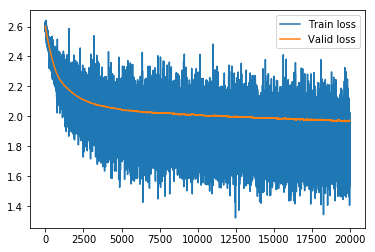

In [20]:
# # Display the learning curve and losses for training, validation, and testing
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(nn.losses['train'], label='Train loss')
plt.plot(nn.losses['valid'], label='Valid loss')
plt.legend()
plt.show()

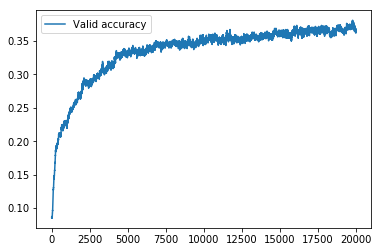

In [21]:
plt.plot(nn.losses['valid_acc'], label='Valid accuracy')
plt.legend()
plt.show()

In [22]:
heading = labels_keys_sorted.copy()
heading.insert(0, 'Id')
heading

['Id',
 'Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [23]:
y_pred, y_logits = nn.test(X_test)
y_prob = l.softmax(y_logits)
y_prob.shape, X_test.shape, y_logits.shape, test_y_sample.shape, test_y_sample[:1]

((10400, 13),
 (10400, 26),
 (10400, 13),
 (10400, 14),
    Id   Blues  Country  Electronic    Folk  International    Jazz   Latin  \
 0   1  0.0964   0.0884      0.0121  0.1004         0.0137  0.1214  0.0883   
 
    New_Age  Pop_Rock     Rap  Reggae     RnB   Vocal  
 0   0.0765    0.0332  0.0445  0.1193  0.1019  0.1038  )

In [24]:
pred_list = []
for Id, pred in enumerate(y_prob):
#     print(Id+1, *pred)
    pred_list.append([Id+1, *pred])

In [25]:
pred_file = open(file='prediction.csv', mode='w')
pred_file.write('\n') # because of the previous line        

for idx in range(len(heading)):
    if idx < len(heading) - 1:
        pred_file.write(heading[idx] + ',')
    else:
        pred_file.write(heading[idx] + '\n')        

# len(test), test[0]
# for key in test:
for i in range(len(pred_list)): # rows
    for j in range(len(pred_list[i])): # cols
        if j < (len(pred_list[i]) - 1):
            pred_file.write(str(pred_list[i][j]))
            pred_file.write(',')
        else: # last item before starting a new line
            pred_file.write(str(pred_list[i][j]) + '\n')        

# pred_file.write(-',')
pred_file.close()

In [26]:
pd.read_csv(filepath_or_buffer='prediction.csv').head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.012509,0.005514,0.011606,0.006224,0.016159,0.028620,0.051981,0.002327,0.003157,0.509715,0.235157,0.096340,0.020692
1,2,0.024403,0.007400,0.019957,0.015553,0.032797,0.007372,0.080871,0.003936,0.006986,0.155039,0.588494,0.029381,0.027812
2,3,0.014542,0.014623,0.023353,0.008609,0.033816,0.001625,0.039405,0.001233,0.024345,0.130790,0.552523,0.144327,0.010810
3,4,0.036936,0.022535,0.094593,0.016718,0.032394,0.014846,0.031117,0.003554,0.020452,0.075717,0.550764,0.055683,0.044690
4,5,0.009100,0.002437,0.017163,0.002149,0.012013,0.001209,0.016516,0.000580,0.009599,0.627836,0.283941,0.015949,0.001507


In [27]:
pd.read_csv(filepath_or_buffer='prediction.csv').shape, test_y_sample.shape

((10400, 14), (10400, 14))

In [28]:
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991
